# Titanic Survivorship Prediction
####  The goal of this analysis is to predict if a passenger survived the sinking of the Titanic or not.
Created by: Aditya Gandakusuma



In [ ]:
# The code was removed by DSX for sharing.

In [1]:
# The code was removed by DSX for sharing.

In [2]:
# The code was removed by DSX for sharing.

In [3]:
# The code was removed by DSX for sharing.

Loading required package: httr
Loading required package: RCurl
Loading required package: bitops

Attaching package: ‘RCurl’

The following object is masked from ‘package:SparkR’:

    base64



## Preprocessing Data

Before start doing the data modeling, we need to know what our data looks like.

In [4]:
str(train)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


We should also check for null values as this have huge impact in understanding the data quality and our modeling

In [5]:
#
# Find columns with missing data
#
attach(ori_train)
missing <- list(Pclass=sum(ori_train$Pclass == ""))
missing$Name <- sum(ori_train$Name == "")
missing$Sex <- sum(ori_train$Sex == "")
missing$Age <- nrow(ori_train[is.na(Age), ])
missing$Fare <- sum(ori_train$Fare == "")
missing$Cabin <- sum(ori_train$Cabin == "")
missing$Embarked <- sum(ori_train$Embarked == "")
missing$Pclass <- sum(ori_train$Pclass == "")
missing$SibSp <- sum(ori_train$SibSp == "")
missing$Parch <- sum(ori_train$Parch == "")
missing$Ticket <- sum(ori_train$Ticket == "")
detach(ori_train)

# Print out the columns with missing data

for (name in names(missing)){
  if (missing[[name]][1] > 0){
    print(paste('',name,' miss ',missing[[name]][1],' values',sep=''))
  }
}

rm(name)

[1] "Age miss 177 values"
[1] "Cabin miss 687 values"
[1] "Embarked miss 2 values"


This shows that Age and Cabin have a lot of missing values.

## Data Exploration
From the data above, let's go with the initial assumption that women, children, and upper-class has higher chance to survive. We will start with comparing male and female.

For easier understanding, we change the 'Survived' status from 0 and 1 become 'Died' and 'Survived'.

In [6]:
train$SurvivedStat <- 'Died'
train$SurvivedStat[train$Survived == 1] <- 'Survived'
train$Survived <- train$SurvivedStat
train$SurvivedStat <- NULL
head(train)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,Died,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,Survived,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,Died,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,Died,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [7]:
table(train$Sex)


female   male 
   314    577 

In [8]:
prop.table(table(train$Sex, train$Survived),1)

        
              Died  Survived
  female 0.2579618 0.7420382
  male   0.8110919 0.1889081

This proves that our assumption is somewhat true. Female has higher chance to survive compared to male. 

Now we continue by comparing adult and children. 

In [9]:
summary(train$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.42   20.12   28.00   29.70   38.00   80.00     177 

In [10]:
table(train$Age)


0.42 0.67 0.75 0.83 0.92    1    2    3    4    5    6    7    8    9   10   11 
   1    1    2    2    1    7   10    6   10    4    3    3    4    8    2    4 
  12   13   14 14.5   15   16   17   18   19   20 20.5   21   22   23 23.5   24 
   1    2    6    1    5   17   13   26   25   15    1   24   27   15    1   30 
24.5   25   26   27   28 28.5   29   30 30.5   31   32 32.5   33   34 34.5   35 
   1   23   18   18   25    2   20   25    2   17   18    2   15   15    1   18 
  36 36.5   37   38   39   40 40.5   41   42   43   44   45 45.5   46   47   48 
  22    1    6   11   14   13    2    6   13    5    9   12    2    3    9    9 
  49   50   51   52   53   54   55 55.5   56   57   58   59   60   61   62   63 
   6   10    7    6    1    8    2    1    4    2    5    2    4    3    4    2 
  64   65   66   70 70.5   71   74   80 
   2    3    1    2    1    2    1    1 

As there are no definition of children yet in the data, we need to define the childrens. We assume that passengers with age lower than 18 are children.

In [11]:
train$Child <- 'Adult'
train$Child[train$Age < 18] <- 'Child'

In [12]:
prop.table(table(train$Child, train$Survived),1)

       
             Died  Survived
  Adult 0.6388175 0.3611825
  Child 0.4601770 0.5398230

Again our initial assumption is valid. Children have slighly higher chance to survive compared to adults. 

Next we want to compare upper class passengers with lower class passengers.

In [13]:
table(train$Pclass)


  1   2   3 
216 184 491 

In [14]:
prop.table(table(train$Pclass, train$Survived),1)

   
         Died  Survived
  1 0.3703704 0.6296296
  2 0.5271739 0.4728261
  3 0.7576375 0.2423625

The data shows that passengers with higher class (in 1st class) has higher chance to survive compared to passengers in lower class (2nd class) and lowest class (3rd class)

Next we try to build additional category of class based on ticket fare.

In [15]:
cat("Fare")
summary(train$Fare)

Fare

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    7.91   14.45   32.20   31.00  512.30 

We separate the ticket fare into 4 categories: below 10, 10-20, 20-30, and higher than 30

In [16]:
train$FareCat <- '>30'
train$FareCat[train$Fare < 30 & train$Fare >= 20] <- '20-30'
train$FareCat[train$Fare < 20 & train$Fare >= 10] <- '10-20'
train$FareCat[train$Fare < 10] <- '<10'

In [17]:
cat("Fare Category")
prop.table(table(train$FareCat, train$Survived),1)

Fare Category

       
             Died  Survived
  <10   0.8005952 0.1994048
  10-20 0.5754190 0.4245810
  20-30 0.5735294 0.4264706
  >30   0.4125000 0.5875000

This show that you pay not only for luxury class, but also for your life.
Next we want to see the relation between fare and passenger class.

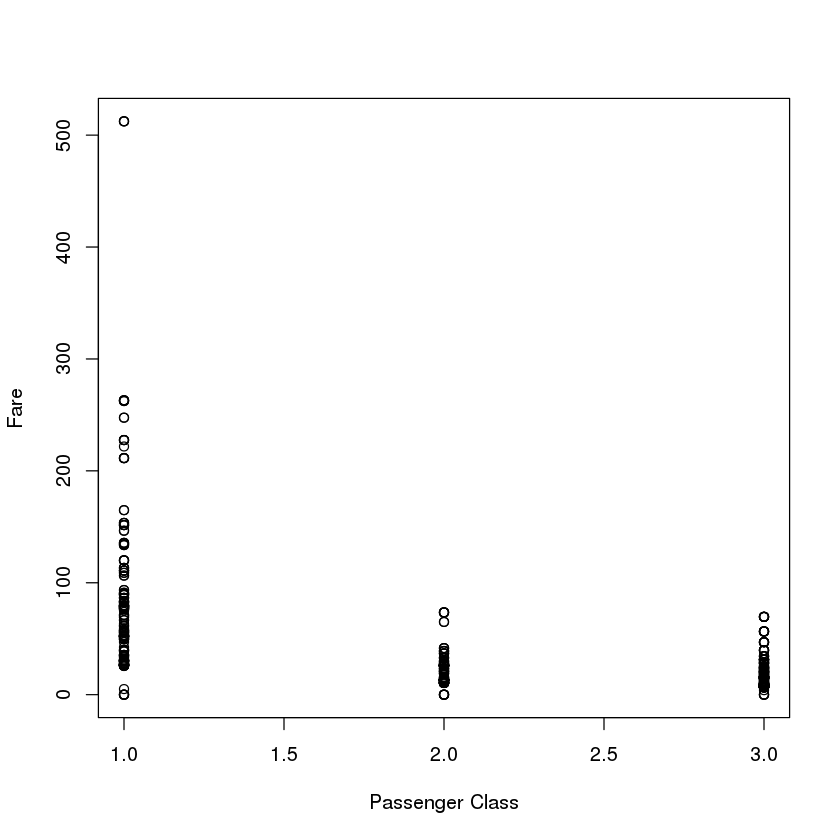

In [18]:
plot(train$Pclass,train$Fare,xlab="Passenger Class", ylab="Fare")

Based on the chart above, we can see that high fare doesn't always mean higher class because many of first class passengers have the same fare with third class passengers. So we need additional input to identify upper-class passengers. Another field that we haven't yet explore is name.

In [19]:
head(train$Name,10)

[1] "Braund, Mr. Owen Harris"                            
 [2] "Cumings, Mrs. John Bradley (Florence Briggs Thayer)"
 [3] "Heikkinen, Miss. Laina"                             
 [4] "Futrelle, Mrs. Jacques Heath (Lily May Peel)"       
 [5] "Allen, Mr. William Henry"                           
 [6] "Moran, Mr. James"                                   
 [7] "McCarthy, Mr. Timothy J"                            
 [8] "Palsson, Master. Gosta Leonard"                     
 [9] "Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"  
[10] "Nasser, Mrs. Nicholas (Adele Achem)"

Found out that there's a title in every name, such as Mr, Mrs, and Master. Perhaps we can use this to identify the upper class passengers. Starting from this point, we will all data (training and test)

In [20]:
test$Survived <- NA
ori_train$SurvivedStat <- 'Died'
ori_train$SurvivedStat[ori_train$Survived == 1] <- 'Survived'
ori_train$Survived <- ori_train$SurvivedStat
ori_train$SurvivedStat <- NULL

all <- rbind(ori_train, test)

In [21]:
all$Title <- sapply(all$Name, FUN=function(x) {strsplit(x, split='[,.]')[[1]][2]})
all$Title <- sub(' ', '', all$Title)
table(all$Title)


        Capt          Col          Don         Dona           Dr     Jonkheer 
           1            4            1            1            8            1 
        Lady        Major       Master         Miss         Mlle          Mme 
           1            2           61          260            2            1 
          Mr          Mrs           Ms          Rev          Sir the Countess 
         757          197            2            8            1            1 

Based on the title, there are too many title which have only 1 member. This will be bad for the modeling, so it will be better if we group them into smaller sets.
We combine:
'Capt', 'Don', 'Major', 'Sir', 'Col' into 'Sir'.

'Dona', 'Lady', 'the Countess', 'Jonkheer','Mme', 'Mlle' into 'Lady'

'Miss','Ms' into 'Miss"

In [22]:
all$Title[all$Title %in% c('Capt', 'Don', 'Major', 'Sir', 'Col')] <- 'Sir'
all$Title[all$Title %in% c('Dona', 'Lady', 'the Countess', 'Jonkheer','Mme', 'Mlle')] <- 'Lady'
all$Title[all$Title %in% c('Miss','Ms')] <- 'Miss'
all$Title <- factor(all$Title)
table(all$Title)


    Dr   Lady Master   Miss     Mr    Mrs    Rev    Sir 
     8      7     61    262    757    197      8      9 

As we have number of siblings/spouses and parents/children for each passengers, we can determine the family size. Family size number include the person itself.

In [23]:
all$FamilySize <- all$SibSp + all$Parch + 1

In [24]:
prop.table(table(all$FamilySize, all$Survived),1)

    
          Died  Survived
  1  0.6964618 0.3035382
  2  0.4472050 0.5527950
  3  0.4215686 0.5784314
  4  0.2758621 0.7241379
  5  0.8000000 0.2000000
  6  0.8636364 0.1363636
  7  0.6666667 0.3333333
  8  1.0000000 0.0000000
  11 1.0000000 0.0000000

In [25]:
train2 <- all[1:891,]
test2 <- all[892:1309,]

For the first model, we will use aspects that are available on the data.

In [26]:
model <- rpart(Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked,
               data=train2,
               method="class")

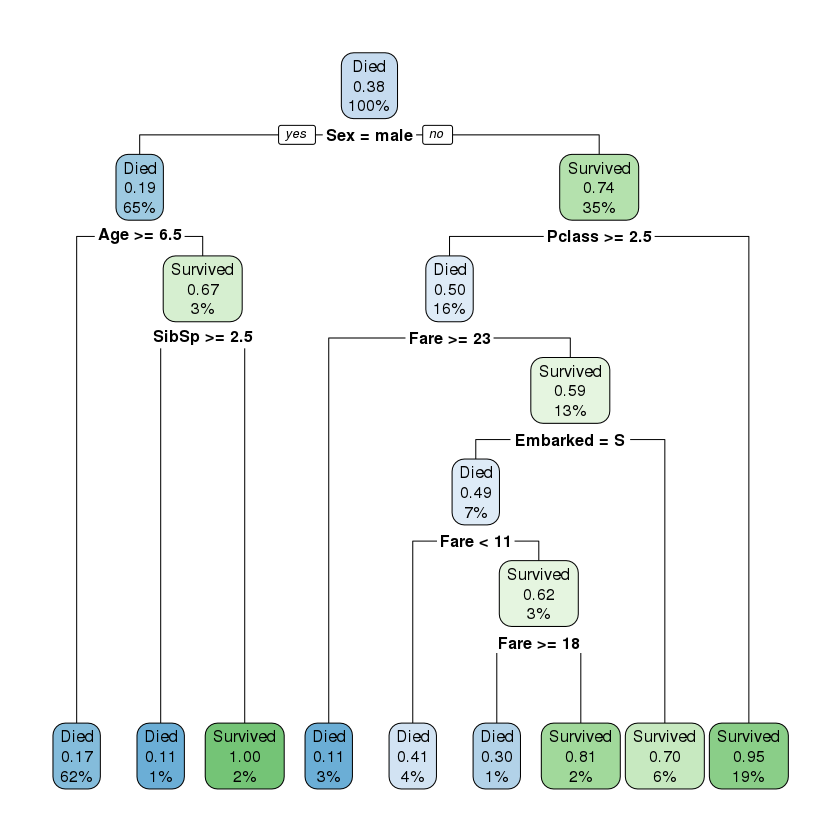

In [27]:
library(rpart.plot)
rpart.plot(model)

In [29]:
Prediction <- predict(model, test2, type = "class")
TrainPrediction <- data.frame(PassengerId = test2$PassengerId, Survived = Prediction)
write.csv(TrainPrediction, file = "submit1.csv", row.names = FALSE)
output1 <- objectStore.put(credentials_1,'submit1.csv')
cat("Saving model to repository")
output1


Saving model to repository

[1] 201

For the second model, we will use aspects that we have added (Title and FamilySize)

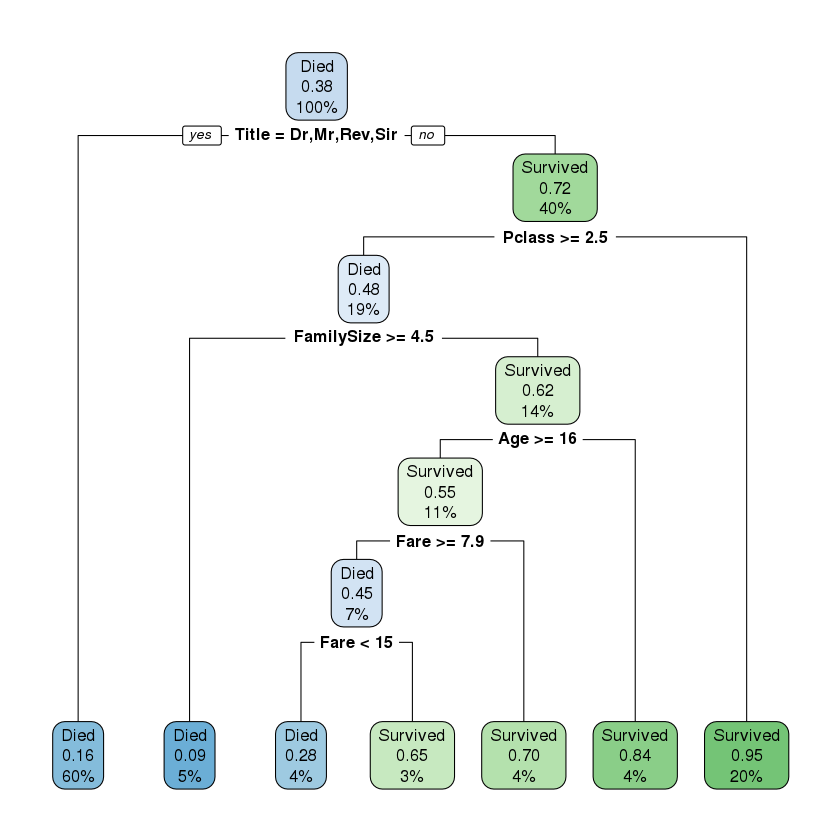

In [30]:
model2 <- rpart(Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked + Title + FamilySize, data=train2, method="class")
rpart.plot(model2)

In [31]:
Prediction2 <- predict(model2, test2, type = "class")
TrainPrediction2 <- data.frame(PassengerId = test2$PassengerId, Survived = Prediction2)
write.csv(TrainPrediction2, file = "submit2.csv", row.names = FALSE)
output2 <- objectStore.put(credentials_1,'submit2.csv')
cat("Saving model to repository")
output2


Saving model to repository

[1] 201

## Conclusion
Based on this model, the conclusion from Titanic disaster are:
1. Women have significantly higher chance of survival than men. *This explains why Rose alive and Jack died in the film :)
2. Passenger in 1st and 2nd class has significant higher chance of survival compared to 3rd class. These may be effect of cabin location too, however there are too many missing cabin data to identify whether cabin location have significant impact or not.
3. People with large family size are most likely not survived. This can be caused of scattered people in chaotic situation and those with large family will have a hard time to find each other before going to rescue boat.